In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


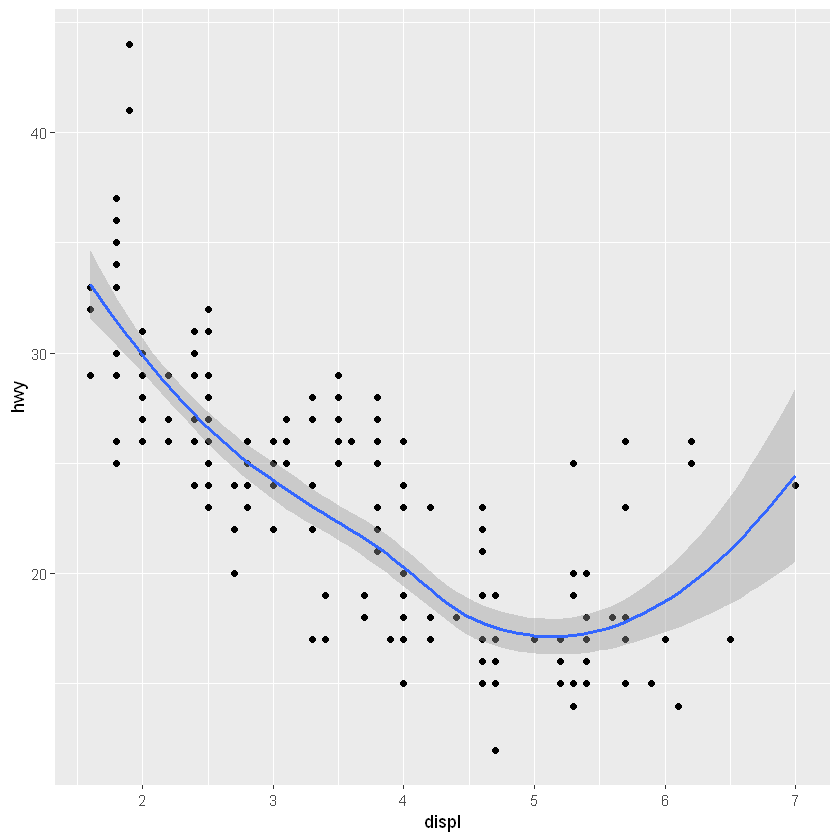

In [2]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


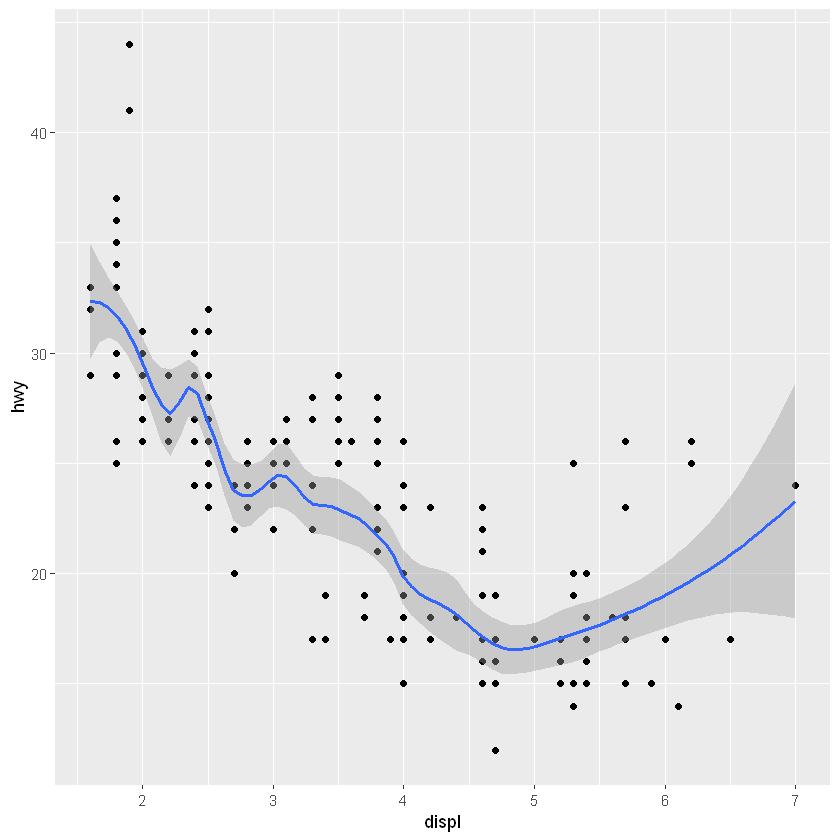

In [3]:
# Use span to control the "wiggliness" of the default loess
# smoother. The span is the fraction of points used to fit
# each local regression: small numbers make a wigglier curve,
# larger numbers make a smoother curve.

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_smooth(span = 0.3)

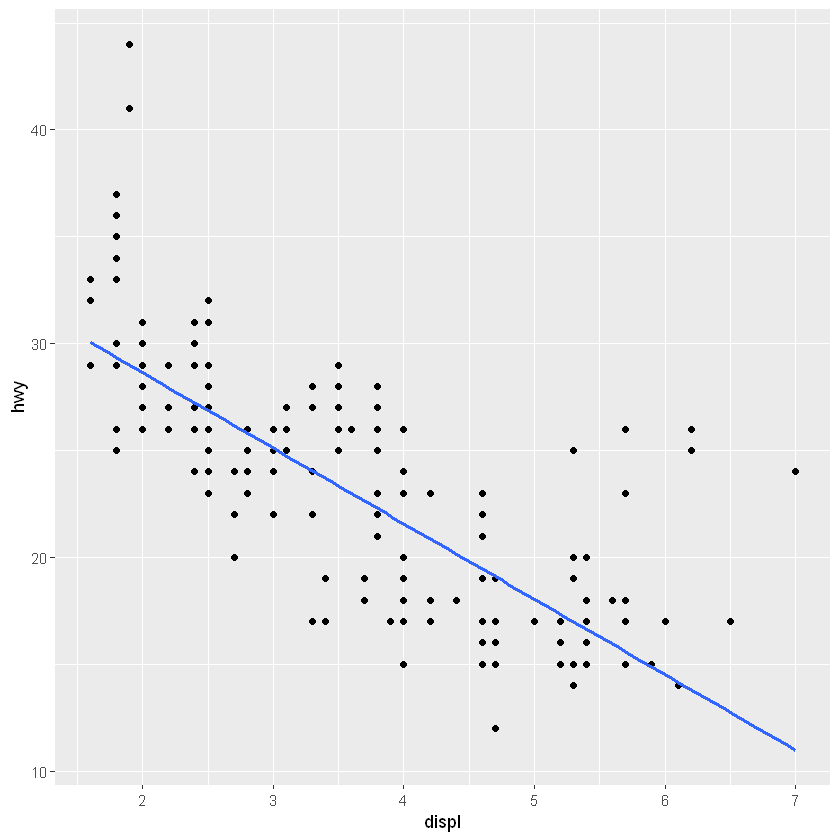

In [4]:
# Instead of a loess smooth, you can use any other
# modelling function:

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_smooth(method = lm, se = FALSE)

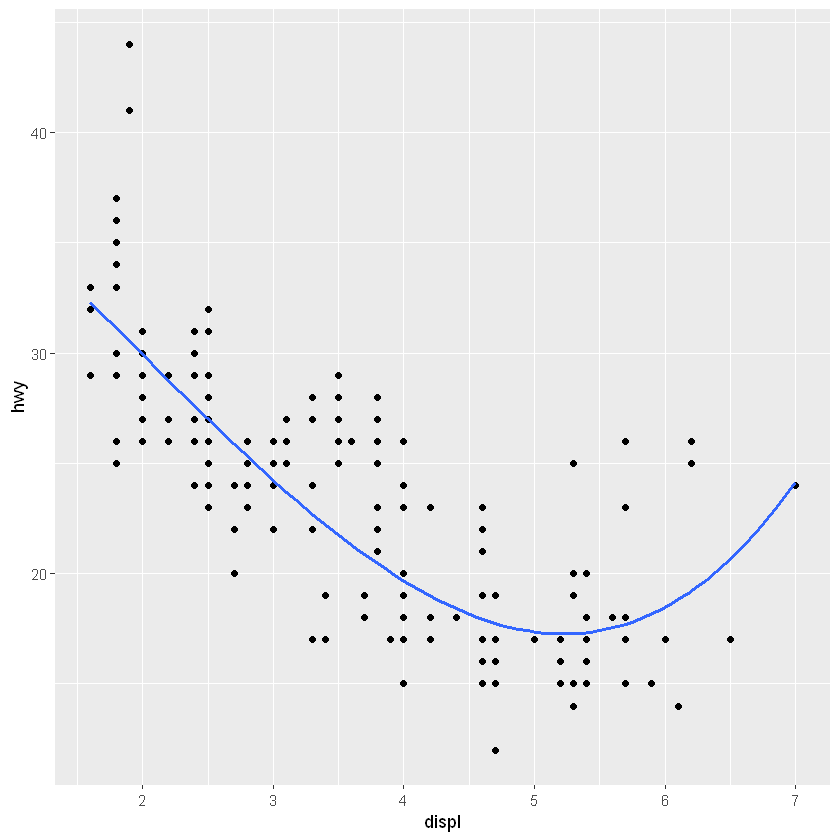

In [5]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_smooth(method = lm, 
              formula = y ~ splines::bs(x, 3), se = FALSE)

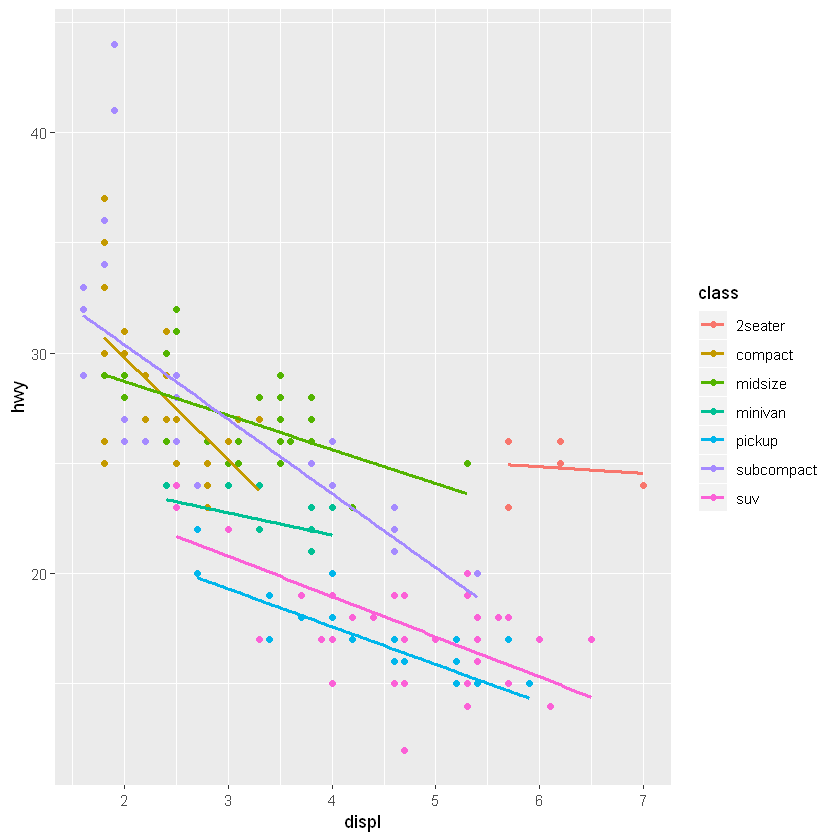

In [6]:
# Smooths are automatically fit to each group (defined by
# categorical aesthetics or the group aesthetic) and for 
# each facet.

ggplot(mpg, aes(displ, hwy, colour = class)) +
  geom_point() +
  geom_smooth(se = FALSE, method = lm)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


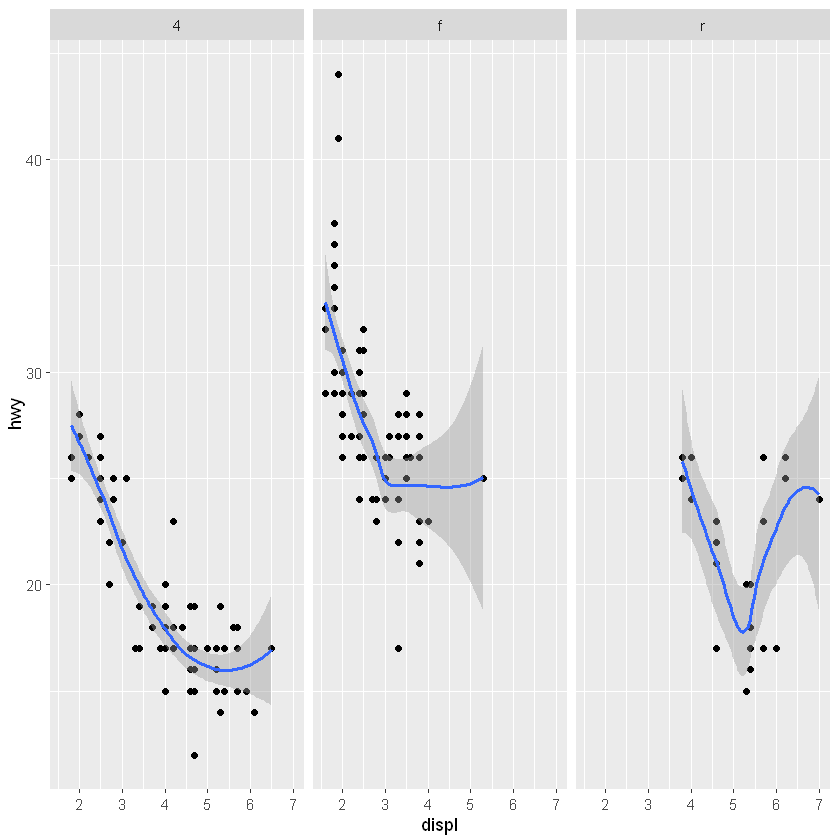

In [7]:
ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_smooth(span = 0.8) +
  facet_wrap(~drv)

Warning message:
"Computation failed in `stat_smooth()`:
y values must be 0 <= y <= 1"

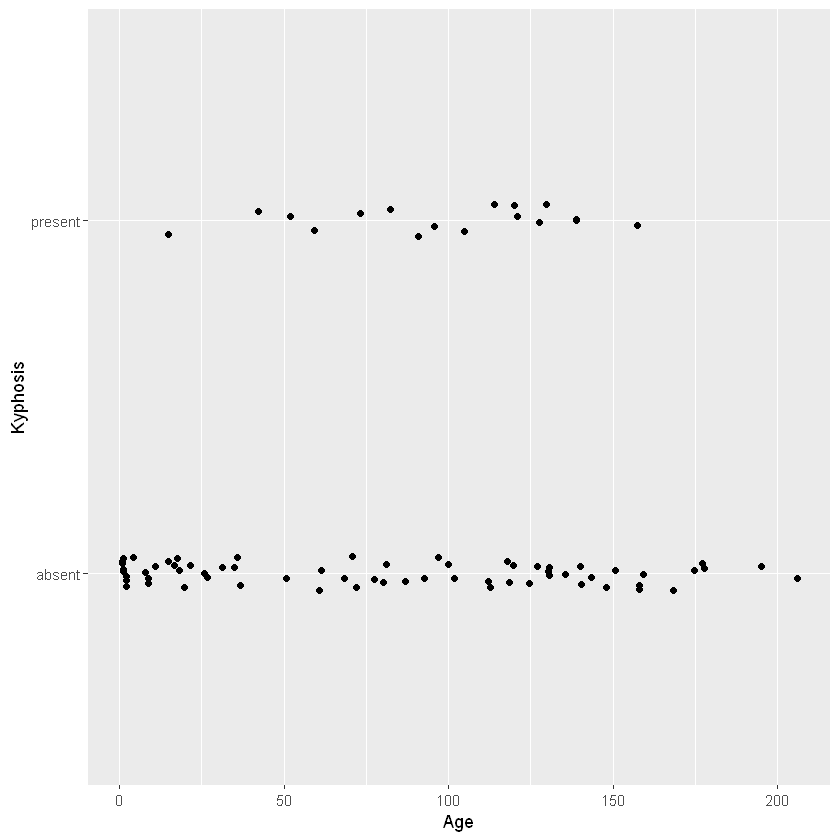

In [8]:
binomial_smooth <- function(...) {
    geom_smooth(method = "glm", 
                method.args = list(family = "binomial"), ...)
}

# To fit a logistic regression, you need to coerce the values
# to a numeric vector lying between 0 and 1.

ggplot(rpart::kyphosis, aes(Age, Kyphosis)) +
  geom_jitter(height = 0.05) +
  binomial_smooth()

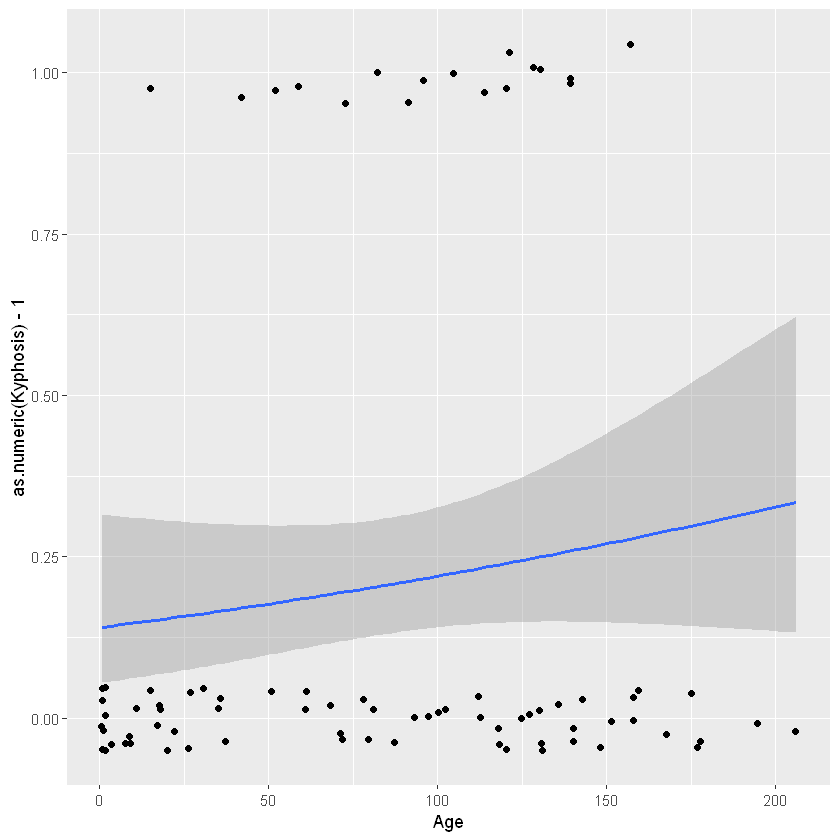

In [9]:
ggplot(rpart::kyphosis, aes(Age, as.numeric(Kyphosis) - 1)) +
  geom_jitter(height = 0.05) +
  binomial_smooth()

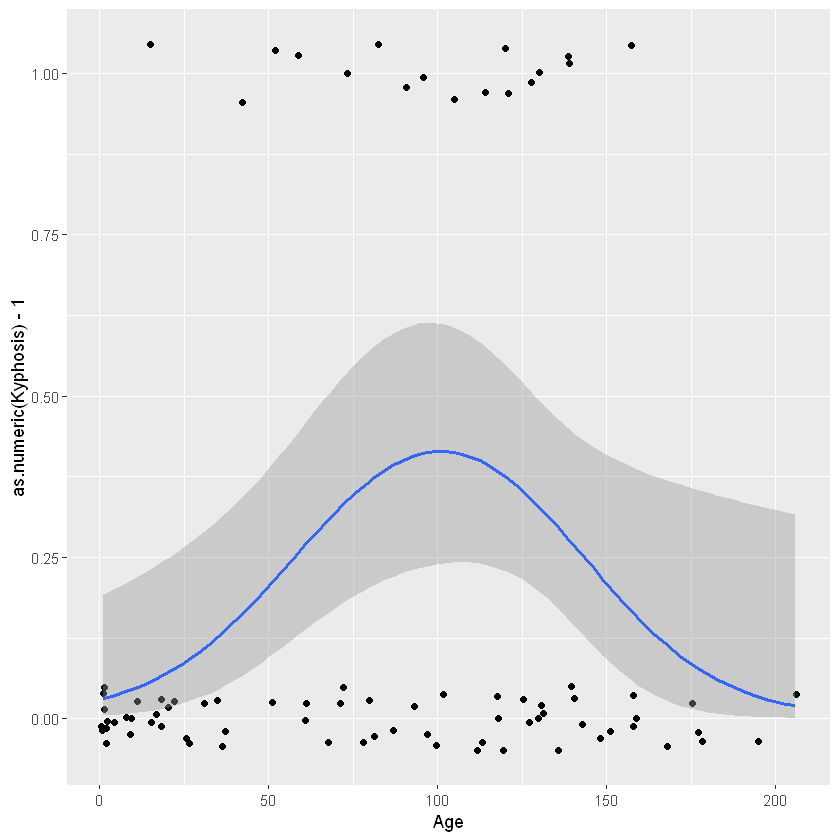

In [10]:
ggplot(rpart::kyphosis, aes(Age, as.numeric(Kyphosis) - 1)) +
  geom_jitter(height = 0.05) +
  binomial_smooth(formula = y ~ splines::ns(x, 2))

In [11]:
# But in this case, it's probably better to fit the model
# yourself so you can exercise more control and see whether
# or not it's a good model.